<a href="https://colab.research.google.com/github/heinerkace/GoodStart/blob/main/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
file = pd.read_csv("sample_data/EcommerceCust.csv")

In [ ]:
df = file

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Exploratory Data Analysis

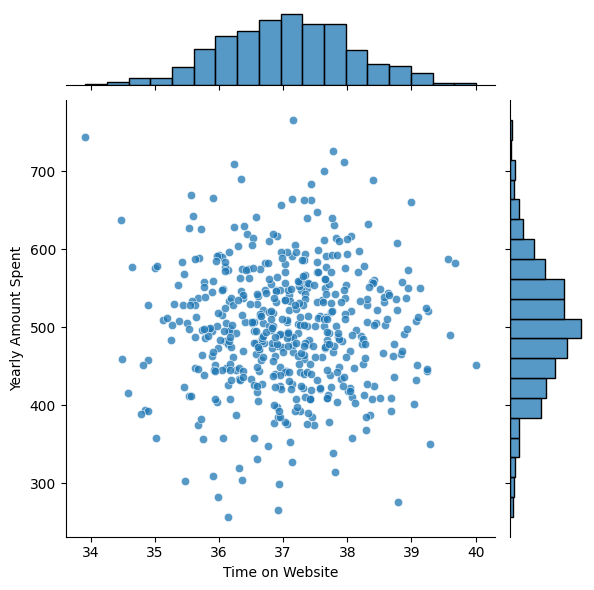

In [ ]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data = df, alpha=0.75)

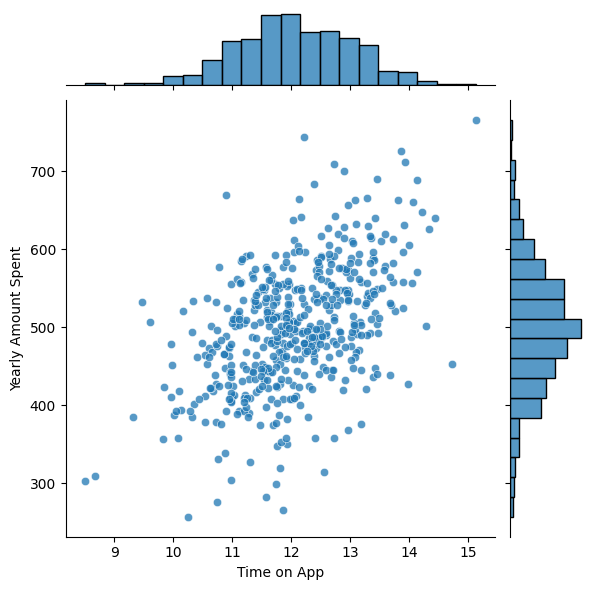

In [ ]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data = df, alpha=0.75)

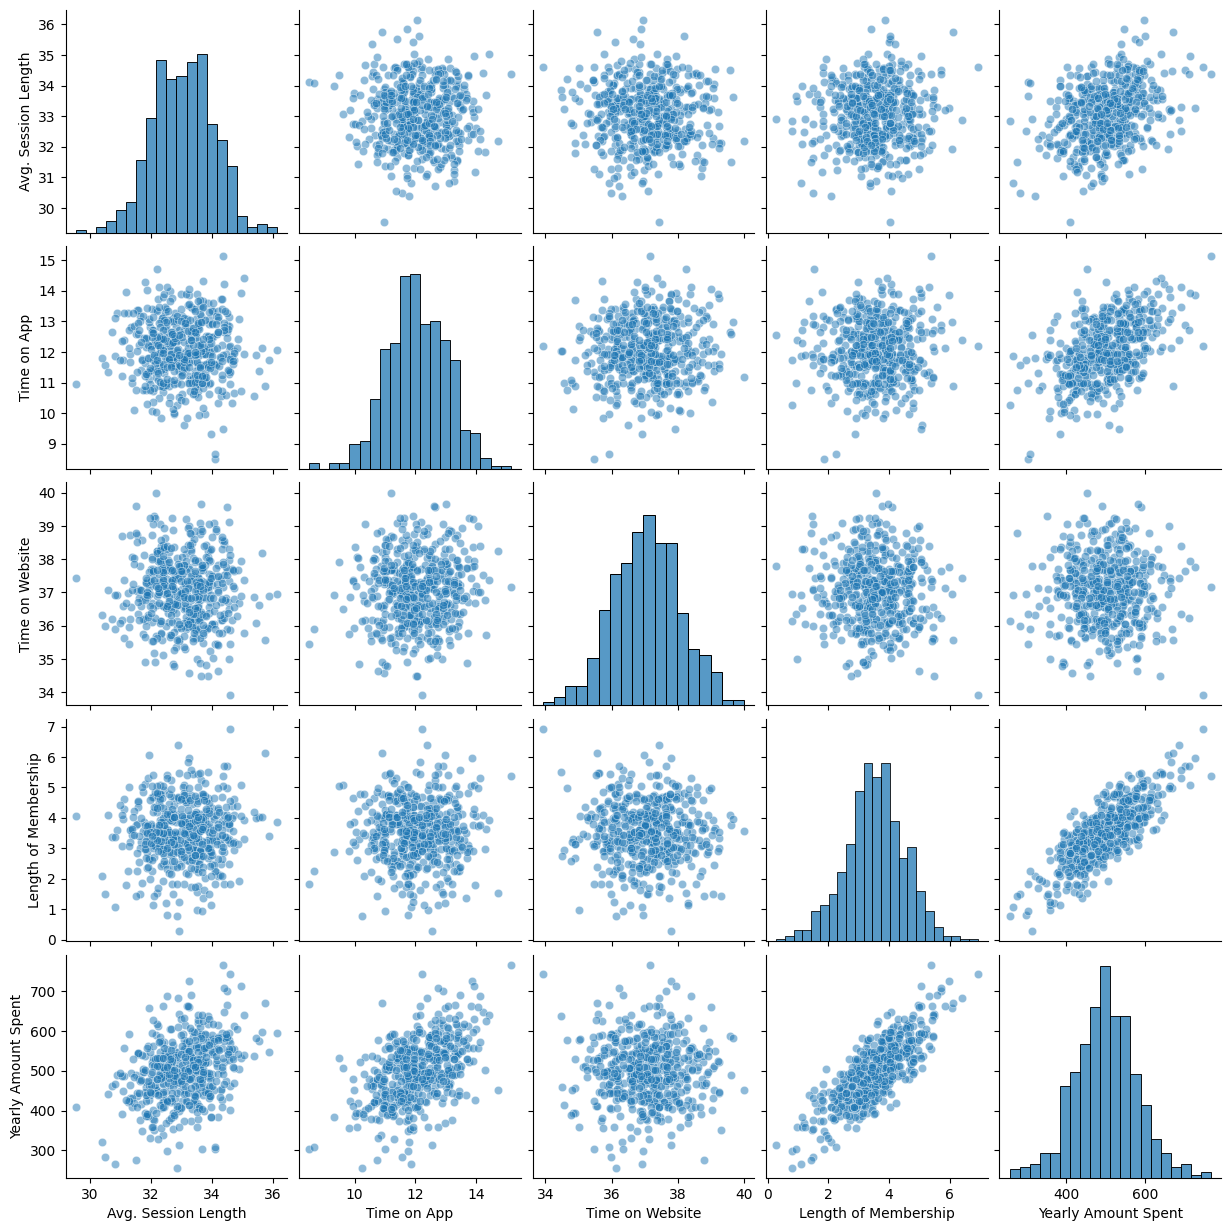

In [ ]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.5})

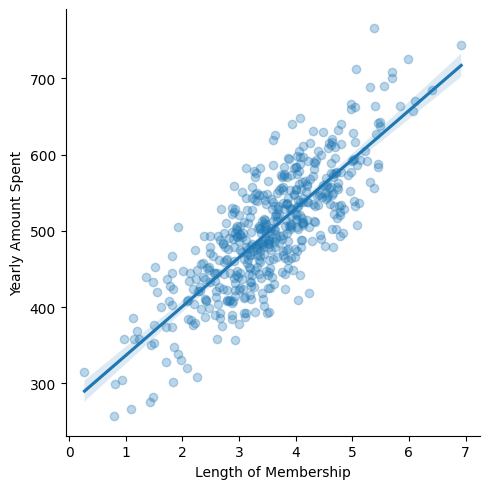

In [ ]:
sns.lmplot(x = "Length of Membership",
           y = "Yearly Amount Spent",
           data = df,
           scatter_kws={"alpha": 0.3})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership' ]]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#training the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [ ]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [2]:
def PredictYearlySpend(AvgSessionLength, TimeOnApp, TimeOnWebsite, LengthOfMembership):
    YearlySpend = (25.724256*AvgSessionLength) + (38.597135*TimeOnApp) + (0.459148*TimeOnWebsite) + (61.279091*LengthOfMembership)
    return YearlySpend

So the Linear Regression Model is...

Yearly Spend Amount = AvgSessionLength*25.

In [ ]:
#predictions

In [ ]:
predictions = lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Plot the actual values against the test values

Text(0.5, 1.0, 'Evaulatin of LM model')

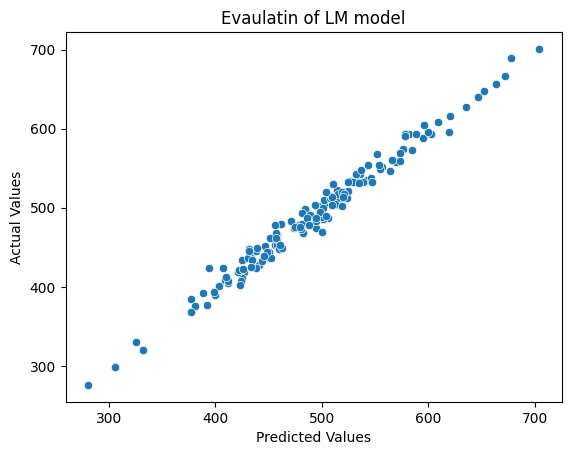

In [ ]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaulation of LM model")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
Root Mean Squared Error:  10.193897260863155


In [ ]:
#residuals

residuals = y_test - predictions

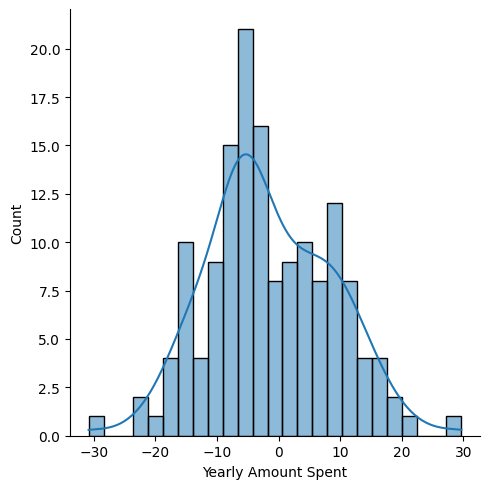

In [ ]:
sns.displot(residuals, bins= 25, kde = True)


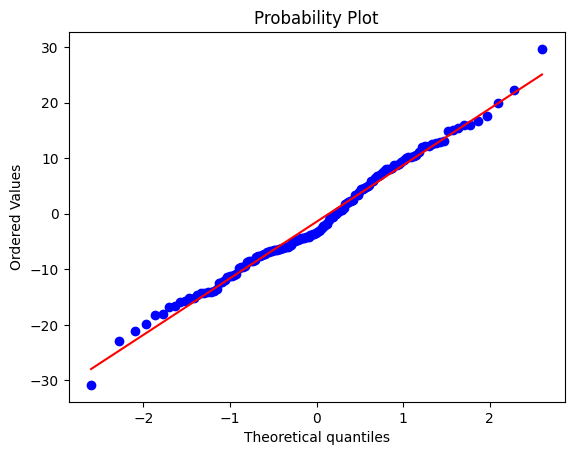

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [5]:
print(f"The Predicted Yearly Spend is ${round(PredictYearlySpend(32, 10, 10, 0.5))}")

The Predicted Yearly Spend is $1244
